# About this project


1. Dataset yang dipakai https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.
2. Dataset harus dibagi menjadi train set dan validation set.
3. Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
4. Harus mengimplementasikan augmentasi gambar.
5. Menggunakan image data generator.
6. Model harus menggunakan model sequential.
7. Pelatihan model tidak melebihi waktu 30 menit.
8. Program dikerjakan pada Google Colaboratory.
9. Akurasi dari model minimal 85%.

# Profile


---

Nama : Celvine Adi Putra

Email : Celvineadiputra2@gmail.com

# UTILS

In [ ]:
def convertTime(seconds):
  min, sec = divmod(seconds, 60)
  hour, min = divmod(min, 60)
  return '%d:%02d:%02d' % (hour, min, sec)

# Prepare Data

In [ ]:
# Load dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

# Extract dataset
!unzip rockpaperscissors.zip -d rockpaperscissors

# Reformat folder
!mkdir /content/dataset
!mv /content/rockpaperscissors/rockpaperscissors/scissors /content/dataset/scissors
!mv /content/rockpaperscissors/rockpaperscissors/rock /content/dataset/rock
!mv /content/rockpaperscissors/rockpaperscissors/paper /content/dataset/paper

# Remove unused resources
!rm -r /content/rockpaperscissors
!rm /content/rockpaperscissors.zip

In [ ]:
# Information about dataset file
!ls /content/dataset/paper | wc -l
!ls /content/dataset/rock | wc -l
!ls /content/dataset/scissors | wc -l

712
726
750


In [ ]:
!pip install split-folders

In [ ]:
import os
import splitfolders

base_path = "/content/dataset/"

splitfolders.ratio(base_path,seed=42, output="data", ratio=(0.6, 0.4))

# Information about data folder
!ls /content/data/train/paper | wc -l
!ls /content/data/train/rock | wc -l
!ls /content/data/train/scissors | wc -l

!ls /content/data/val/paper | wc -l
!ls /content/data/val/rock | wc -l
!ls /content/data/val/scissors | wc -l

Copying files: 2188 files [00:00, 2532.25 files/s]


427
435
450
285
291
300


# Start Code

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1. / 255, rotation_range = 20, horizontal_flip = True, shear_range = 0.2, fill_mode = 'nearest', brightness_range = [0.1, 1.5], validation_split = 0.3)
val_datagen = ImageDataGenerator(rescale = 1. / 255, rotation_range = 20, shear_range = 0.2, brightness_range = [0.1, 1.5], validation_split = 0.3)

In [ ]:
path_train_directory = "/content/data/train"
path_val_directory = "/content/data/val"

In [ ]:
train_generator = train_datagen.flow_from_directory(path_train_directory, target_size = (100, 100), batch_size = 32, class_mode = "categorical", seed = 42)
val_generator = val_datagen.flow_from_directory(path_val_directory, target_size = (100, 100), batch_size = 32, class_mode = "categorical", seed = 42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=train_generator.image_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 49, 49, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 23, 23, 32)       

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.Nadam(), metrics=['accuracy'])

In [ ]:
class callbackModel(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") >= 0.98):
      self.model.stop_training=True

In [ ]:
from timeit import default_timer as timer

start = timer()

history = model.fit(train_generator, steps_per_epoch = 25, epochs = 20, validation_data = val_generator, validation_steps = 5, verbose = 2, callbacks = [callbackModel()])

end = timer()
print(f"Waktu Tranning %s" % convertTime(end - start))

Epoch 1/20
25/25 - 20s - loss: 1.1044 - accuracy: 0.3388 - val_loss: 1.0979 - val_accuracy: 0.3063 - 20s/epoch - 806ms/step
Epoch 2/20
25/25 - 18s - loss: 1.0689 - accuracy: 0.4563 - val_loss: 1.0345 - val_accuracy: 0.5188 - 18s/epoch - 706ms/step
Epoch 3/20
25/25 - 18s - loss: 0.8317 - accuracy: 0.6637 - val_loss: 0.7221 - val_accuracy: 0.7875 - 18s/epoch - 710ms/step
Epoch 4/20
25/25 - 19s - loss: 0.4055 - accuracy: 0.8650 - val_loss: 0.3456 - val_accuracy: 0.9000 - 19s/epoch - 743ms/step
Epoch 5/20
25/25 - 18s - loss: 0.2751 - accuracy: 0.9162 - val_loss: 0.2226 - val_accuracy: 0.9438 - 18s/epoch - 707ms/step
Epoch 6/20
25/25 - 18s - loss: 0.2040 - accuracy: 0.9337 - val_loss: 0.1795 - val_accuracy: 0.9500 - 18s/epoch - 717ms/step
Epoch 7/20
25/25 - 18s - loss: 0.2062 - accuracy: 0.9337 - val_loss: 0.2014 - val_accuracy: 0.9438 - 18s/epoch - 721ms/step
Epoch 8/20
25/25 - 18s - loss: 0.2049 - accuracy: 0.9425 - val_loss: 0.1982 - val_accuracy: 0.9563 - 18s/epoch - 707ms/step
Epoch 9/

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

41/41 [==============================] - 12s 304ms/step - loss: 0.0555 - accuracy: 0.9825
Loss: 0.0555
Accuracy: 0.9825


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_probs = model.predict(val_generator)
y_preds = y_probs.argmax(axis = 1)

cm = confusion_matrix(y_preds, val_generator.labels)

print(cm)

28/28 [==============================] - 7s 239ms/step
[[101 100  97]
 [ 84  91 101]
 [100 100 102]]


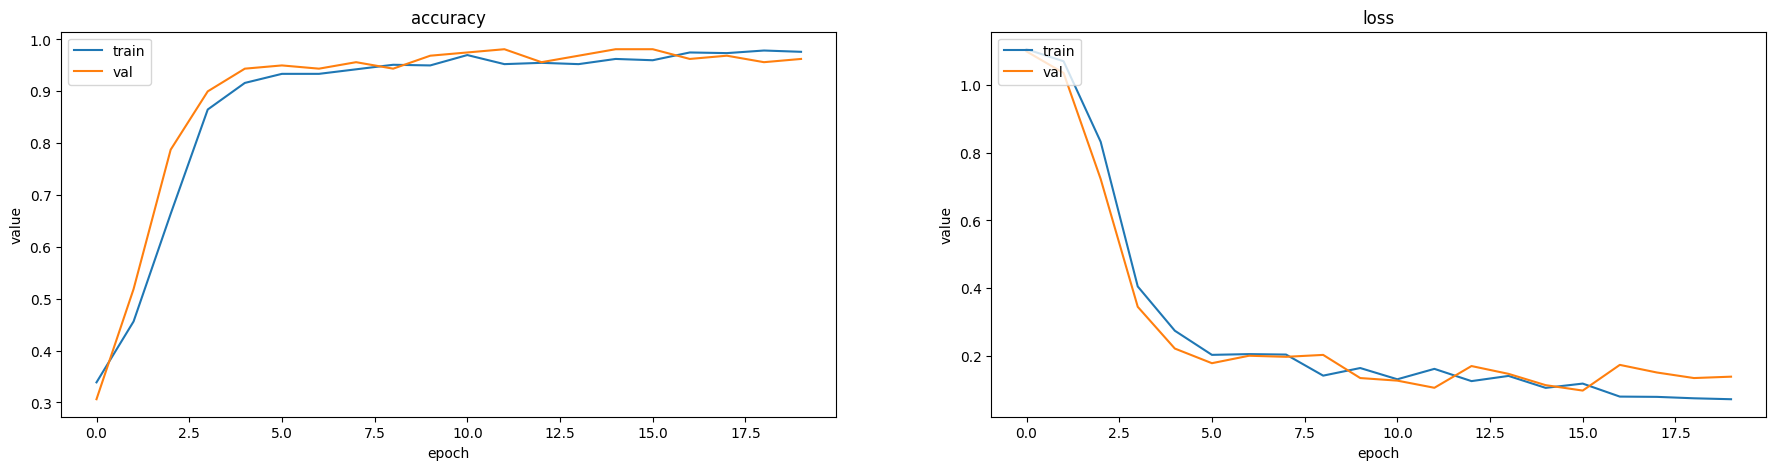

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

# Test Model

Saving 1yDUM1w2HTbuPIfO.png to 1yDUM1w2HTbuPIfO.png
1/1 [==============================] - 0s 76ms/step
0.0
Scissors


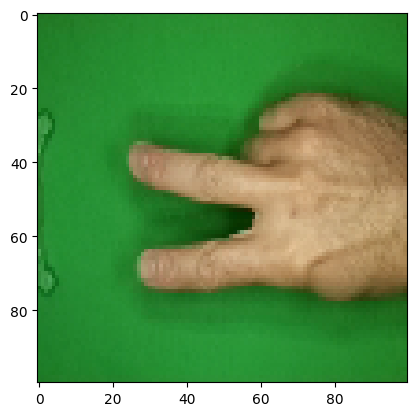

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(100,100))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(classes[0,0])
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')